완전연결층과 타이타닉 데이터


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [ ]:
model = Sequential()
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [ ]:
# 실행을 위한 코드 추가
import numpy as np
import pandas as pd

In [ ]:
# 실행을 위한 코드 추가

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
from tensorflow.keras.utils import to_categorical
data_train_np = np.zeros([891,8])
data_train_np = np.zeros([data_train.shape[0],8])

In [ ]:
sex_num = np.zeros(data_train_np.shape[0])
sex_num[np.array(data_train['Sex']=='female')]=1

In [ ]:
data_train_np[:, 0:2] = to_categorical(sex_num)
data_train_np[:,2:5] = to_categorical(data_train['Pclass'].to_numpy()-1)
data_train_np[:,5] = data_train['Age']/80
data_train_np[:,6] = data_train['SibSp']/10
data_train_np[:,7] = data_train['Parch']/10
data_train_np[np.isnan(data_train_np)] = 30/80

data_train_np_y = to_categorical(data_train['Survived'])

In [ ]:
print(data_train_np)

[[1.    0.    0.    ... 0.275 0.1   0.   ]
 [0.    1.    1.    ... 0.475 0.1   0.   ]
 [0.    1.    0.    ... 0.325 0.    0.   ]
 ...
 [0.    1.    0.    ... 0.375 0.1   0.2  ]
 [1.    0.    1.    ... 0.325 0.    0.   ]
 [1.    0.    0.    ... 0.4   0.    0.   ]]


In [ ]:
print(data_train['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
hist = model.fit(data_train_np,data_train_np_y,epochs= 200, batch_size=128, validation_split=0.3)

Epoch 1/200
5/5 [==============================] - 1s 68ms/step - loss: 0.6796 - accuracy: 0.6003 - val_loss: 0.6468 - val_accuracy: 0.6418
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.6469 - accuracy: 0.6051 - val_loss: 0.6161 - val_accuracy: 0.6418
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 0.6233 - accuracy: 0.6180 - val_loss: 0.5899 - val_accuracy: 0.6418
Epoch 4/200
5/5 [==============================] - 0s 15ms/step - loss: 0.5989 - accuracy: 0.6613 - val_loss: 0.5603 - val_accuracy: 0.7463
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 0.5726 - accuracy: 0.7432 - val_loss: 0.5328 - val_accuracy: 0.7575
Epoch 6/200
5/5 [==============================] - 0s 20ms/step - loss: 0.5494 - accuracy: 0.7673 - val_loss: 0.5129 - val_accuracy: 0.8022
Epoch 7/200
5/5 [==============================] - 0s 18ms/step - loss: 0.5299 - accuracy: 0.8010 - val_loss: 0.4913 - val_accuracy: 0.8022
Epoch 8/200
5/5 [===

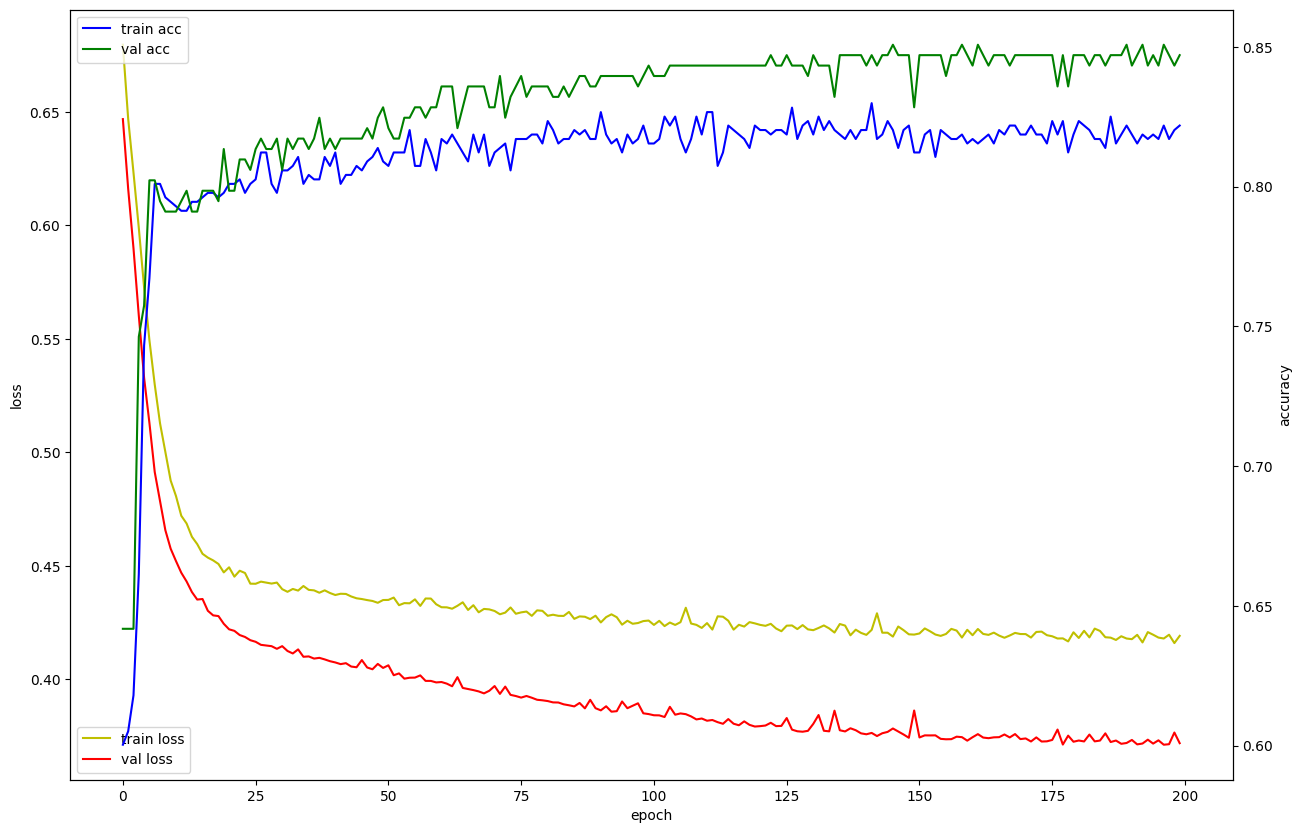

In [ ]:
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize=(15,10)) # 10x15 크기의 figure 생성
  loss_ax = plt.gca()        # figure의 기본 축 가져오기
  acc_ax = loss_ax.twinx()      # 축을 1개 더 추가

  #손실 변화 양상을 그래프로 표시
  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='lower left')

  #정확도 변화 양상을 그래프로 표시
  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper left')

  plt.show() #그래프를 화면에 그림

drawHistory(hist) #학습 경과를 그래프로 그리는 함수 호출

In [ ]:
# 실행을 위한 코드 추가
from tensorflow.keras.utils import to_categorical

cnt = 0
sex_num = np.zeros(data_test.shape[0])

data_test_np = np.zeros([data_test.shape[0],8])  # 비어있는 numpy 배열 생성
data_test_np[:,0:2] = to_categorical(sex_num)
data_test_np[:,2:5] = to_categorical(data_test['Pclass'].to_numpy()-1)

for d in data_test['Sex']:
  if(d == 'female'):
    sex_num[cnt] = 1
    cnt = cnt +1

#나이, 형제/배우자수, 부모/자녀수 정규화
data_test_np[:,5] = data_test['Age']/80
data_test_np[:,6] = data_test['SibSp']/10
data_test_np[:,7] = data_test['Parch']/10

#nan값의 처리
data_test_np[np.isnan(data_test_np)] = 30/80

In [ ]:
o = model.predict(data_test_np)

14/14 [==============================] - 0s 2ms/step


In [ ]:
print(o)

[[0.8532459  0.14675403]
 [0.8762565  0.12374336]
 [0.89070356 0.10929639]
 [0.8303498  0.16965027]
 [0.81109524 0.18890466]
 [0.6389306  0.36106926]
 [0.8429978  0.15700218]
 [0.83323914 0.16676092]
 [0.7483089  0.2516911 ]
 [0.8502457  0.14975429]
 [0.8429978  0.15700218]
 [0.44117743 0.5588226 ]
 [0.4321982  0.5678018 ]
 [0.90490663 0.09509343]
 [0.6093058  0.39069414]
 [0.84440804 0.1555919 ]
 [0.8613944  0.13860554]
 [0.7920016  0.2079984 ]
 [0.8504833  0.14951663]
 [0.8623238  0.13767603]
 [0.6256918  0.3743081 ]
 [0.3432631  0.65673685]
 [0.37577063 0.62422943]
 [0.42335564 0.5766444 ]
 [0.6478896  0.35211036]
 [0.8781102  0.12188992]
 [0.43221244 0.56778747]
 [0.8039371  0.19606292]
 [0.43411672 0.5658832 ]
 [0.8686781  0.13132189]
 [0.89801013 0.10198988]
 [0.8668304  0.13316962]
 [0.8446884  0.15531164]
 [0.83075047 0.16924956]
 [0.49104914 0.50895077]
 [0.7579957  0.24200422]
 [0.8429978  0.15700218]
 [0.7920016  0.2079984 ]
 [0.8191002  0.18089981]
 [0.8429978  0.15700218]


In [ ]:
o = np.argmax(o,-1)

In [ ]:
print(o)

[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0]


In [ ]:
answer = np.zeros([418,2])
answer[:,0] = data_test['PassengerId']
answer[:,1] = o

In [ ]:
df_answer = pd.DataFrame(answer) # 배열 answer를 판다스 라이브러리의 DataFrame
                                 # 형식으로 변환하고, df_frame 변수에 저장한다.
df_answer.columns =['PassengerID','Survived']       # 각 열의 제목을 지정한다.
df_answer = df_answer.astype('int32')               # 데이터를 정수형으로 바꾼다.
df_answer.to_csv('test_pridict.csv', index = False) # 결과를 csv 파일로 저장한다.
                                                    # (index는 제외한다)

In [ ]:
print(df_answer)

     PassengerID  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
